In [52]:
using CausalForest
using Plots
using StatsBase

In [53]:
indices,X,T,Y = load_data("causal");
Xtest = rand(Float64, (1000, size(X, 2)));
Xtest[:, 1] =  LinRange(0, 1, 1000);
true_effect = Xtest[:, 1].>0.5;

# Subsampling not honest

In [54]:
cf1 = build_forest(false, false, false, Y, T, X, -1, 100);
pred1 = apply_forest(cf1, Xtest);

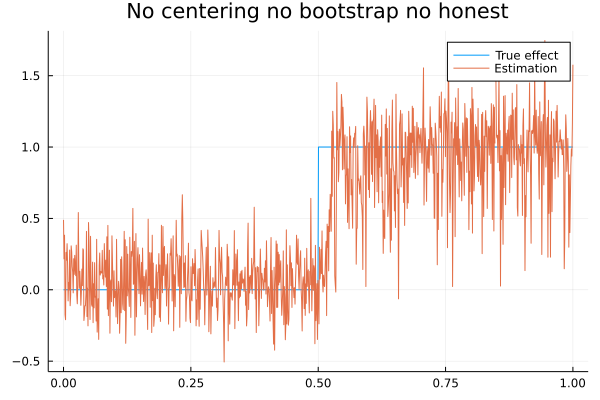

In [55]:
plot(Xtest[:, 1], [true_effect, pred1], label=["True effect" "Estimation"], title = "No centering no bootstrap no honest", fmt = :png)

In [56]:
cf2 = build_forest(true, false, false, Y, T, X, -1, 100);
pred2 = apply_forest(cf2, Xtest);

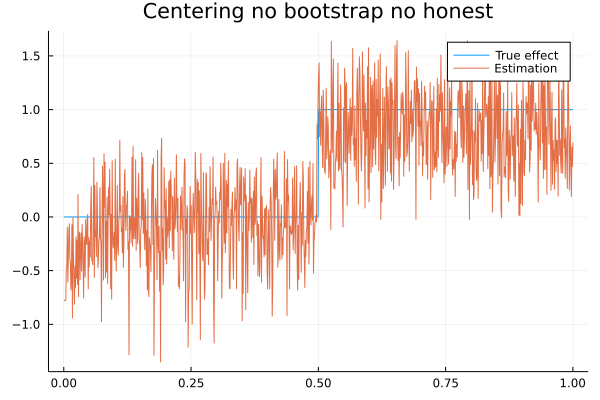

In [57]:
plot(Xtest[:, 1], [true_effect, pred2], label=["True effect" "Estimation"], title = "Centering no bootstrap no honest", fmt = :png)

In [72]:
rmsd(float(true_effect), pred1)

NaN

In [73]:
rmsd(float(true_effect), pred2)

0.4146931258575567

# Subsampling honest

In [60]:
cf3 = build_forest(false, false, true, Y, T, X, -1, 100);
pred3 = apply_forest(cf3, Xtest);

In [61]:
cf4 = build_forest(true, false, true, Y, T, X, -1, 100);
pred4 = apply_forest(cf4, Xtest);

In [62]:
rmsd(float(true_effect), pred3)

0.1683083688288084

In [63]:
rmsd(float(true_effect), pred4)

0.15285013797955213

# Bootstrap not honest

In [64]:
cf5 = build_forest(false, true, false, Y, T, X, -1, 100);
pred5 = apply_forest(cf5, Xtest);

In [65]:
cf6 = build_forest(true, true, false, Y, T, X, -1, 100);
pred6 = apply_forest(cf6, Xtest);

In [66]:
rmsd(float(true_effect), pred5)

0.21537985846040733

In [67]:
rmsd(float(true_effect), pred6)

0.22698021012786998

# Bootstrap honest

In [68]:
cf7 = build_forest(false, true, true, Y, T, X, -1, 100);
pred7 = apply_forest(cf7, Xtest);

In [69]:
cf8 = build_forest(true, true, true, Y, T, X, -1, 100);
pred8 = apply_forest(cf8, Xtest);

In [70]:
rmsd(float(true_effect), pred7)

0.17754603645745676

In [71]:
rmsd(float(true_effect), pred8)

0.12099279222722666

# 500 arbres

# Subsampling not honest

In [74]:
cf1 = build_forest(false, false, false, Y, T, X, -1, 500);
pred1 = apply_forest(cf1, Xtest);

In [75]:
cf2 = build_forest(true, false, false, Y, T, X, -1, 500);
pred2 = apply_forest(cf2, Xtest);

In [76]:
rmsd(float(true_effect), pred1)

0.28963672037310245

In [77]:
rmsd(float(true_effect), pred2)

0.40312350903644567

# Subsampling honest

In [78]:
cf3 = build_forest(false, false, true, Y, T, X, -1, 500);
pred3 = apply_forest(cf3, Xtest);

In [79]:
cf4 = build_forest(true, false, true, Y, T, X, -1, 500);
pred4 = apply_forest(cf4, Xtest);

In [80]:
rmsd(float(true_effect), pred3)

0.1547204445921635

In [81]:
rmsd(float(true_effect), pred4)

0.1415716619231555

# Bootstrap not honest

In [82]:
cf5 = build_forest(false, true, false, Y, T, X, -1, 500);
pred5 = apply_forest(cf5, Xtest);

In [83]:
cf6 = build_forest(true, true, false, Y, T, X, -1, 500);
pred6 = apply_forest(cf6, Xtest);

In [84]:
rmsd(float(true_effect), pred5)

0.20176678080838253

In [85]:
rmsd(float(true_effect), pred6)

0.21975519259052573

# Bootstrap honest

In [86]:
cf7 = build_forest(false, true, true, Y, T, X, -1, 500);
pred7 = apply_forest(cf7, Xtest);

In [87]:
cf8 = build_forest(true, true, true, Y, T, X, -1, 500);
pred8 = apply_forest(cf8, Xtest);

In [88]:
rmsd(float(true_effect), pred7)

0.15380258303749747

In [89]:
rmsd(float(true_effect), pred8)

0.1191388236632537

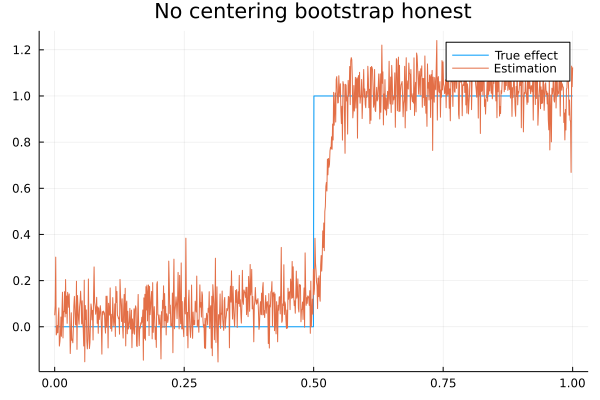

In [90]:
plot(Xtest[:, 1], [true_effect, pred7], label=["True effect" "Estimation"], title = "No centering bootstrap honest", fmt = :png)

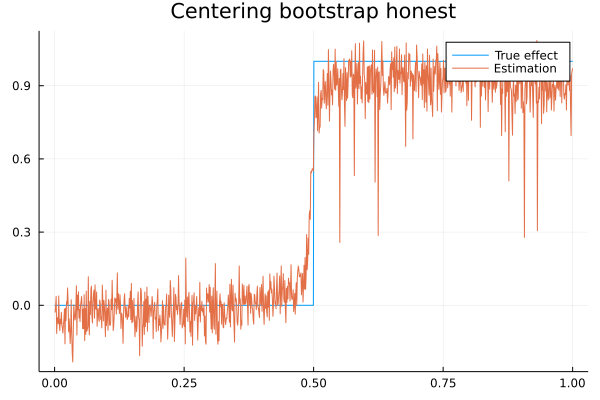

In [91]:
plot(Xtest[:, 1], [true_effect, pred8], label=["True effect" "Estimation"], title = "Centering bootstrap honest", fmt = :png)